absl-py==0.12.0
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.3
appdirs==1.4.4
appnope==0.1.0
appscript==1.0.1
asgiref==3.2.7
asn1crypto==1.0.1
astor==0.8.1
astroid==2.3.1
astropy==3.2.2
astunparse==1.6.3
atomicwrites==1.3.0
attrs==19.2.0
Automat==20.2.0
autopep8==1.5.3
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.5
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.8.0
bitarray==1.0.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.3.4
boto==2.49.0
Bottleneck==1.2.1
CacheControl==0.12.10
cachetools==4.2.1
cachy==0.3.0
certifi==2019.9.11
cffi==1.12.3
chardet==3.0.4
cleo==0.8.1
Click==7.0
clikit==0.6.2
cloudpickle==1.2.2
clyent==1.2.2
colorama==0.4.1
conda==4.8.3
conda-build==3.18.9
conda-package-handling==1.6.0
conda-verify==3.4.2
configparser==5.0.2
constantly==15.1.0
contextlib2==0.6.0
crashtest==0.3.1
cryptography==2.7
cssselect==1.1.0
cycler==0.10.0
Cyt

In [2]:
from models import *

import sys
import time
import datetime
import argparse
from PIL import Image
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
from torchvision import transforms
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np
import gc
import pickle
from tqdm.notebook import tqdm
import numpy as np
from fastprogress import progress_bar
from sklearn.svm import OneClassSVM
import cv2
import pandas as pd
import psutil
import math


In [2]:
!pwd

/Users/ritwikkanodia/Desktop/NTU/NTU 4.2/FYP/main


## Load YOLO Model

In [2]:
model_def = 'yolov3-custom.cfg'
img_size = 416
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_weights = 'yolov3_ckpt_48.pth'

In [4]:
!ls

000003.png               hooks.py                 t_ds_feature_extract.py
000008.txt               id_ds_features.py        tds_extraction.py
__pycache__              id_ds_images.py          tds_feat_extract.py
classes.names            image_3                  tmp.py
config                   job.sh                   train.txt
data                     logs                     utils
error_TestJob_45956.err  models.py                valid.txt
error_TestJob_46430.err  ood_ds_features          yolov3-custom.cfg
feature_extraction.ipynb ood_ds_images.py         yolov3_ckpt_43_main.pth
feature_extractor.py     output                   yolov3_ckpt_48.pth
features                 output_TestJob_42460.out
helper.py                output_TestJob_45956.out


In [5]:
model = Darknet(model_def, img_size=img_size).to(device)
model.load_state_dict(torch.load(pretrained_weights, map_location=torch.device('cpu')))

<All keys matched successfully>

In [6]:
model

Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (conv_0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_0): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_1): LeakyReLU(negative_slope=0.1)
    )
    (2): Sequential(
      (conv_2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_2): LeakyReLU(negative_slope=0.1)
    )
    (3): Sequential(
      (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_3): BatchNorm2d(64, eps=1e-05, momen

#### model

In [ ]:
"""
conv_2d
max_pooling
"""

## Feature extraction

In [18]:
features = {}
def get_features(name):
    def hook(model, input, output):
        features[name] = output.detach()
    return hook

In [19]:
model.module_list[0].conv_0.register_forward_hook(get_features('feats'))

In [20]:
imsize=416
loader = transforms.Compose([transforms.Scale(imsize), transforms.ToTensor()])

/Users/ritwikkanodia/opt/anaconda3/lib/python3.7/site-packages/torchvision/transforms/transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [17]:
img_path = '000000.png'
img_pre = preprocess_img(img_path)

img_path2 = '000001.png'
img_pre2 = preprocess_img(img_path2)

NameError: name 'loader' is not defined

In [16]:
def preprocess_img(img_path):
    img = Image.open(img_path)
    newsize = (416, 416)
    img = img.resize(newsize)
    image = loader(img).float()
    test_value = Variable(image)
    test_value = test_value.float()
    test_value = test_value.unsqueeze(0)
    return test_value

In [21]:
img_pre = np.array(preprocess_img('000000.png'))
images=os.listdir('kitti_test')
for img in tqdm(images[:3]):
    img_pre2 = np.array(preprocess_img('kitti_test/' + img))
    img_pre = np.append(img_pre, img_pre2, 0)
    del img_pre2

In [22]:
img_pre = torch.tensor(img_pre)

In [23]:
img_pre.shape

torch.Size([4, 3, 416, 416])

In [24]:
prediction = model(img_pre)

In [24]:
prediction.shape

torch.Size([4, 10647, 6])

In [25]:
features['feats'].shape

torch.Size([4, 32, 416, 416])

features['feats'].permute(0, 2, 3, 1).shape

## t_ds extraction

In [26]:
def preprocess_img(img):
#     img = Image.open(img_path)
    newsize = (416, 416)
    img = img.resize(newsize)
    image = loader(img).float()
    test_value = Variable(image)
    test_value = test_value.float()
    test_value = test_value.unsqueeze(0)
    return test_value

In [15]:
import shutil
with open('valid.txt') as ft:
    val_images = ft.readlines()
    for val_image in tqdm(val_images):
        val_image = val_image.split('/')[-1][:-1]
        print(val_image)
        val_label = val_image.split('.')[0] + '.txt'
        curr_dir = "/Users/ritwikkanodia/Desktop/NTU/NTU 4.1/FYP/main/data/kitti_train/kitti_labels/" + val_label
        new_dir = "/Users/ritwikkanodia/Desktop/NTU/NTU 4.1/FYP/main/data/kitti_val/kitti_labels/" + val_label
        shutil.move(curr_dir, new_dir)
        


004863.png
006912.png
006906.png
004877.png
005599.png
004687.png
001927.png
006090.png
001099.png
000387.png
003856.png
002590.png
003842.png
002584.png
000393.png
001933.png
006084.png
004693.png
004678.png
003117.png
002209.png
005566.png
001700.png
007371.png
007417.png
000378.png
001066.png
006709.png
005200.png
003671.png
005214.png
003665.png
007403.png
001072.png
001714.png
007365.png
003103.png
005572.png
006053.png
000422.png
004644.png
002235.png
003895.png
002553.png
004122.png
000344.png
006735.png
000350.png
006721.png
005228.png
003881.png
002547.png
003659.png
004136.png
004650.png
004888.png
002221.png
006047.png
001728.png
000436.png
007359.png
002976.png
000807.png
000813.png
002962.png
002792.png
000185.png
006292.png
005943.png
004485.png
005957.png
004491.png
006286.png
007198.png
000191.png
002786.png
003498.png
003473.png
005002.png
001264.png
007173.png
001502.png
005764.png
003315.png
005770.png
003301.png
007167.png
000608.png
001516.png
006279.png
001270.png

In [18]:
# getting all the id bboxes in the t_ds in numpy array format
count =0 
all_images = np.array([])
  
# Getting % usage of virtual_memory ( 3rd field)

img_pre = np.array([])
with open('train.txt') as ft:
    train_images = ft.readlines()
    for train_image in tqdm(train_images):
        train_image = train_image.split('/')[-1]
        label_dir = 'kitti_train/kitti_labels/' + train_image[: -1].split('.')[0] + '.txt'
        image_dir = 'kitti_train/images/' + train_image[: -1]
        cropped_image_dir = 'kitti_train/cropped_images/'
        masked_image_dir = 'kitti_train/masked_images_resized/'
#         print(label_dir)
#         print(image_dir)
#         img = Image.open(image_dir)
        image = cv2.imread(image_dir)
        with open(label_dir) as fp:
            Lines = fp.readlines()
            for line in Lines:
                if line.split(" ")[0] != 'Car' and line.split(" ")[0] != 'Van':
                    continue
                bbox_coords = line.split(" ")[4:8]
#                 x1, y1, x2, y2 = float(bbox_coords[0]), float(bbox_coords[1]), float(bbox_coords[2]), float(bbox_coords[3])
                x1, y1, x2, y2 = math.floor(float(bbox_coords[0])), math.floor(float(bbox_coords[1])), math.floor(float(bbox_coords[2])), math.floor(float(bbox_coords[3]))
                '''
                # Cropping
                img2 = img.crop((x1, y1, x2, y2))
                newsize = (416, 416)
                img2 = img2.resize(newsize)
                img2.save(cropped_image_dir + str(count) + '.png')
                count+=1
                '''
                
                # masking
                newsize = (416, 416)
                mask = np.zeros(image.shape[:2], dtype="uint8")
                cv2.rectangle(mask, (x1, y1), (x2, y2), 255, -1)
                masked = cv2.bitwise_and(image, image, mask=mask)
                resized = cv2.resize(masked, newsize)
                cv2.imwrite(masked_image_dir + str(count)+'.png', resized)
                count+=1
                '''
                img_pre = np.array(img2)
              
                
                if all_images.shape[0]>0:
                    all_images = np.append(all_images, img_pre.reshape((1, 416, 416, 3)), 0)
                else:
                    all_images = img_pre.reshape((1, 416, 416, 3))
#                 del img_pre2
                del img, img2, img_pre
                '''
            
    


 43%|████▎     | 1619/3741 [00:36<00:44, 47.54it/s]


 89%|████████▉ | 3331/3741 [01:11<00:10, 39.21it/s]


100%|██████████| 3741/3741 [01:20<00:00, 46.54it/s]


In [ ]:

images_dir = os.listdir('kitti_train/masked_images_resized')
all_images = np.array([])
for image_dir in tqdm(images_dir[:5]):
#     img = Image.open('kitti_train/masked_images_resized/' + image_dir)
#     img_arr = np.array(img) 
#     print(img.shape)
    img_arr = cv2.imread('kitti_train/masked_images_resized/' + image_dir)
    img_arr = img_arr.reshape((1, 416, 416, 3))
    if all_images.shape[0]>0:
        all_images = np.append(all_images, img_arr, 0)
    else:
        all_images = img_arr
#     img.close()
    del img_arr
    
        
print(all_images.shape)

In [ ]:
from helper import cropAndResize
# given the labels after detction on Kitti val, convert to array
root = "/home/FYP/ritwik002/data"
# root = "data"
kitti_val_images = os.listdir(root + "/kitti_val/images")[1:]
count = 0

for img_name in tqdm.tqdm(kitti_val_images):
    label_dir = (
        root + "/kitti_val/kitti_val_detection/labels/" + img_name[:-1].split(".")[0] + ".txt"
    )  # labels generated oby running detection with yolo
    image_dir = root + "/kitti_val/images/" + img_name  # original validation images
    cropped_image_dir = (
        root + "/kitti_val/kitti_val_detection/id_ds_cropped_images/"
    )  # dir to store masked image
    # image = cv2.imread(image_dir)
    img = Image.open(image_dir)
    if count == 0:
        print("For image:")
        print(label_dir)
        print(image_dir)
        print(cropped_image_dir)
        print()
    image_batch = np.array([])
    bbox_count = 0
    with open(label_dir) as fp:
        Lines = fp.readlines()
        if len(Lines) != 0:
            for line in Lines:
                print("for bbox ", count)
                bbox_coords = line.split(",")
                print(bbox_coords)
                bbox_coords = [math.floor(float(x)) for x in bbox_coords]
                x1, x2, y1, y2 = (
                    bbox_coords[0],
                    bbox_coords[1],
                    bbox_coords[2],
                    bbox_coords[3],
                )

                # masking
                # masked_img = maskAndResize(image, x1, y1, x2, y2)
                cropped_img = cropAndResize(img,  x1, y1, x2, y2)
                cropped_img.save(cropped_image_dir + str(count) + "_" + bbox_count +  '.png')
                # cv2.imwrite(masked_image_dir + str(count) + ".png", masked_img) # imgs are alr stored
                
                count += 1
                bbox_count += 1


(375, 1242, 3)


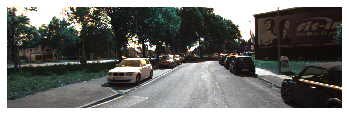

(375, 1242, 3)


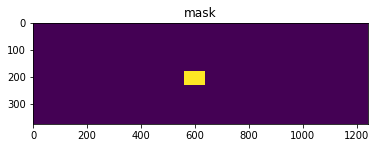

(375, 1242)


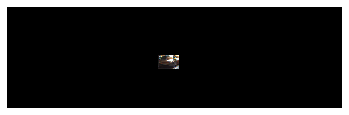

In [22]:
image = cv2.imread('data/kitti_train/images/' + '000010.png')
print(image.shape)
plt.imshow(image)
plt.axis('off')
# plt.title('original')
plt.savefig('original_000010.png', bbox_inches="tight", dpi=300, pad_inches = 0)
plt.show()
# cv2.imshow("Original", image)
# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
# 354.43 185.52 549.52 294.49
# 1013.39 182.46 1241.00 374.0
# 819.63 178.12 926.85 251.56
# 558.55 179.04 635.05 230.61

#614.24 181.78 727.31 284.77
mask = np.zeros(image.shape[:2], dtype="uint8")
print(image.shape)
cv2.rectangle(mask, (559, 179), (635, 231), 255, -1)
plt.imshow(mask)
plt.title('mask')
plt.show()

print(mask.shape)
# cv2.imshow("Rectangular Mask", mask)
# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt.axis('off')
plt.imshow(masked)
# plt.title('mask applied')
plt.savefig('masked_000010_4z.png', bbox_inches="tight", dpi=500,pad_inches = 0)
# plt.savefig('masked_000010.pdf')
plt.show()
# cv2.imshow("Mask Applied to Image", masked)
# cv2.waitKey(0)

<Figure size 432x288 with 0 Axes>

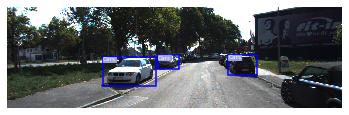

In [31]:
img = np.array(Image.open('data/kitti_train/images/' + '000010.png'))
plt.figure()
fig, ax = plt.subplots(1)
ax.imshow(img)
detections = [[354, 186, 550, 294], [559, 179, 635, 231], [820, 178, 927, 252]]

for x1, y1, x2, y2 in detections:        
    
    box_w = x2 - x1
    box_h = y2 - y1

    color = bbox_colors[int(np.where(unique_labels == int(cls_pred))[0])]
    # Create a Rectangle patch
    bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=1.5, edgecolor="blue", facecolor="none")
    # Add the bbox to the plot
    ax.add_patch(bbox)
#             Add label
    plt.text(
        x1,
        y1,
        s=classes[int(cls_pred)],
        color="white",
        verticalalignment="top",
        bbox={"color": color, "pad": 0},
        fontsize = "xx-small",
    )

plt.axis("off")
plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())
plt.savefig('sample.png', bbox_inches="tight", dpi=500, pad_inches = 0)

In [ ]:
td_ds_feats = np.array([])
td_ds_feats_all = np.array([])
for batch in range(0, 3741, batch_size):
    image_batch = img_pre[batch: batch+batch_size]
    prediction = model(image_batch)
    if td_ds_feats.shape[0]>0:
        td_ds_feats = np.append(td_ds_feats, features['feats'], 0)
    else:
        td_ds_feats = features['feats']

    print(td_ds_feats.shape)

In [ ]:
img = img2
newsize = (416, 416)
img = img.resize(newsize)
image = loader(img).float()
test_value = Variable(image)
test_value = test_value.float()
test_value = test_value.unsqueeze(0)

prediction = model(test_value)

## Detection

In [4]:
log_df = pd.DataFrame(columns = ['Image', 'YOLO_inference_time', 'Yolo_OODL_time', 'OSVM_inference_time'])
log_df.head()

,Image,YOLO_inference_time,Yolo_OODL_time,OSVM_inference_time


In [13]:
from __future__ import division

from models import *
from utils.utils import *
from utils.datasets import *

import os
import sys
import time
import datetime
import argparse

from PIL import Image

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import NullLocator
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

os.makedirs("dummy_output", exist_ok=True)

# Set up model
model = Darknet(model_def, img_size=img_size).to(device)

if weights_path.endswith(".weights"):
    # Load darknet weights
    model.load_darknet_weights(weights_path)
else:
    # Load checkpoint weights
    model.load_state_dict(torch.load(weights_path, map_location=torch.device('cpu')))

model.eval()  # Set in evaluation mode

dataloader = DataLoader(
    ImageFolder(image_folder, img_size=img_size),
    batch_size=batch_size,
    shuffle=False,
    num_workers=n_cpu,
)

classes = load_classes(class_path)  # Extracts class labels from file

Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

imgs = []  # Stores image paths
img_detections = []  # Stores detections for each image index

print("\nPerforming object detection:")
prev_time = time.time()
for batch_i, (img_paths, input_imgs) in enumerate(dataloader):
    # Configure input
    print(img_paths)
    img_names = img_paths[0].split('/')[-1]
    input_imgs = Variable(input_imgs.type(Tensor))

    # Get detections
    with torch.no_grad():
        detections = model(input_imgs)
        detections = non_max_suppression(detections, conf_thres, nms_thres)

    # Log progress
    current_time = time.time()
    inference_time = datetime.timedelta(seconds=current_time - prev_time)
    prev_time = current_time
    log_df.loc[batch_i] = [img_names, inference_time, None, None]
    print("\t+ Batch %d, Inference Time: %s" % (batch_i, inference_time))

    # Save image and detections
    imgs.extend(img_paths)
    img_detections.extend(detections)

# Bounding-box colors
cmap = plt.get_cmap("tab20b")
colors = [cmap(i) for i in np.linspace(0, 1, 20)]

print("\nSaving images:")
# Iterate through images and save plot of detections
for img_i, (path, detections) in enumerate(zip(imgs, img_detections)):
#     print("detections: ", detections)
    print("(%d) Image: '%s'" % (img_i, path))

    # Create plot
    img = np.array(Image.open(path))
    plt.figure()
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Draw bounding boxes and labels of detections
    if detections is not None:
        # Rescale boxes to original image
#         print("detections: ", detections.shape)
#         print(img_size)
#         print(img.shape)
        detections = rescale_boxes(detections, img_size, img.shape[:2])
#         print(detections.shape)
#         break
        unique_labels = detections[:, -1].cpu().unique()
        n_cls_preds = len(unique_labels)
        bbox_colors = random.sample(colors, n_cls_preds)
        bbox_coords = []
    
        for x1, y1, x2, y2, conf, cls_conf, cls_pred in detections:        
            bbox_coords.append(str(round(x1.item(), 3)) + ',' + str(round(x2.item(), 3)) + ',' + str(round(y1.item(), 3))  + ',' + str(round(y2.item(), 3)))
            print("\t+ Label: %s, Conf: %.5f" % (classes[int(cls_pred)], cls_conf.item()))

            box_w = x2 - x1
            box_h = y2 - y1

            color = bbox_colors[int(np.where(unique_labels == int(cls_pred))[0])]
            # Create a Rectangle patch
            bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=0.5, edgecolor=color, facecolor="none")
            # Add the bbox to the plot
            ax.add_patch(bbox)
            # Add label
#             plt.text(
#                 x1,
#                 y1,
#                 s=classes[int(cls_pred)],
#                 color="white",
#                 verticalalignment="top",
#                 bbox={"color": color, "pad": 0},
#                 fontsize = "xx-small",
#             )
            

    # Save generated image with detections
    plt.axis("off")
    plt.gca().xaxis.set_major_locator(NullLocator())
    plt.gca().yaxis.set_major_locator(NullLocator())
    filename = path.split("/")[-1].split(".")[0]
    plt.savefig(f"dummy_output/{filename}.png", bbox_inches="tight", pad_inches=0.0, dpi=1000)
    plt.close()
#     print(bbox_coords)
    with open(f"dummy_output/{filename}.txt", 'w') as f:
        f.write('\n'.join(bbox_coords))


names:  ['Cars']

Performing object detection:
('image_3/000004.png',)
	+ Batch 0, Inference Time: 0:00:01.326921
('image_3/000005.png',)
	+ Batch 1, Inference Time: 0:00:01.336119
('image_3/000006.png',)
	+ Batch 2, Inference Time: 0:00:01.315439
('image_3/000012.png',)
	+ Batch 3, Inference Time: 0:00:01.357284
('image_3/maxresdefault.jpeg',)
	+ Batch 4, Inference Time: 0:00:01.312730

Saving images:
(0) Image: 'image_3/000004.png'
	+ Label: Cars, Conf: 0.99999
	+ Label: Cars, Conf: 1.00000
(1) Image: 'image_3/000005.png'
	+ Label: Cars, Conf: 0.99998
	+ Label: Cars, Conf: 1.00000
	+ Label: Cars, Conf: 1.00000
	+ Label: Cars, Conf: 1.00000
	+ Label: Cars, Conf: 0.99999
(2) Image: 'image_3/000006.png'
	+ Label: Cars, Conf: 1.00000
	+ Label: Cars, Conf: 0.99996
	+ Label: Cars, Conf: 1.00000
(3) Image: 'image_3/000012.png'
	+ Label: Cars, Conf: 1.00000
	+ Label: Cars, Conf: 0.99999
	+ Label: Cars, Conf: 1.00000
	+ Label: Cars, Conf: 0.99999
	+ Label: Cars, Conf: 0.99997
	+ Label: Cars, 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [37]:
log_df.head()

,Image,YOLO_inference_time,Yolo_OODL_time,OSVM_inference_time
0,000000.png,00:00:00.982120,None,None
1,000001.png,00:00:00.971058,None,None
2,maxresdefault.jpeg,00:00:00.957930,None,None


In [ ]:
img = Image.open("output/maxresdefault.png")
img

In [76]:
x_center, y_center, width, height = 0.5464814814814815, 0.55136, 0.034363929146537894, 0.0886933333333333
# x1,x2,y1,y2 = x_center + (width/2), x_center - (width/2), y_center + (height/2), y_center - (height/2)
x1,y1,x2, y2 = 657.39, 190.13, 700.07, 223.39
print(x1,x2,y1,y2)
img = Image.open("kitti_train/images/000002.png")
img2 = img.crop((x1, y1, x2, y2))

657.39 700.07 190.13 223.39


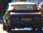

In [77]:
img2
# mask other pixels

In [37]:
im = cv2.imread("image_3/maxresdefault.jpeg")
height,width,depth = im.shape
cv2.rectangle(im,(384,0),(510,128),(0,255,0),3)
cv2.rectangle(rectangle,(width/2,height/2),200,1,thickness=-1)

masked_data = cv2.bitwise_and(im, im, mask=rectangle)

cv2.imshow("masked_data", masked_data)
cv2.waitKey(0)

cv2

NameError: name 'rectangle' is not defined

In [27]:

img = img2
newsize = (416, 416)
img = img.resize(newsize)
image = loader(img).float()
test_value = Variable(image)
test_value = test_value.float()
test_value = test_value.unsqueeze(0)

prediction = model(test_value)

In [28]:





features['feats'].shape

torch.Size([1, 32, 416, 416])

## Plot features (Umap)

import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np

class Umapper():
    def __init__(self, ds_name, layer_idx, layer_name):
        self.ds_name = ds_name #name of dataset
        self.layer_idx = layer_idx
        self.layer_name = layer_name
    
    def fit_umap_for_layer(self, ood_ds_name, id_outputs, ood_outputs):
        reducer = umap.UMAP()
        self.ood_ds_name = ood_ds_name
        id_outputs = id_outputs
        ood_outputs = ood_outputs
        print('fitting umap model..')
        self.model = reducer.fit_transform(np.vstack((id_outputs, ood_outputs)))
    
    def plot_umap(self, save:bool = False, save_dir:str = None):
        plt.figure(figsize=(20,20))
        plt.title(f'UMAP of layer {self.layer_idx}: {self.layer_name}', fontsize=24)
        # plt.title(f'UMAP of layer {self.layer_idx}: {type(self.layers[self.layer_idx]).__name__}', fontsize=24)
        plt.scatter(self.model[:10000, 0], self.model[:10000, 1], alpha=.5, label=self.ds_name)
        plt.scatter(self.model[10000:, 0], self.model[10000:, 1], alpha=.5, label=self.ood_ds_name)
        plt.legend(fontsize=24)
        plt.axis('off')
        if save:
            plt.savefig(save_dir+'/'+str(self.layer_idx)+'.png')
        plt.show()
        
    def get_layer_output(self, layer_idx, ds_name:str, ds_type:str = 'test'):
        return LayerOutputExtractor(self.ds_name, self.layers).get_features(layer_idx, ds_name, ds_type)


In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'kitti_train/masked_images_resized/',
  seed=123,
  image_size=(416, 416),
  batch_size=32)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory kitti_train/masked_images_resized/. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
img_arr = cv2.imread(images_dir + "/" + image_name)

### duckie time evaluation

In [5]:
from __future__ import division

from models import *
from utils.utils import *
from utils.datasets import *
import os
import time
import datetime
from PIL import Image
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import NullLocator
import pandas as pd
from helper import maskAndResize, batch_image_mean, load_ood_detection_models

log_df_1 = pd.DataFrame(columns=["Image", "YOLO_inference_time"])

log_df_2 = pd.DataFrame(
    columns=[
        "num_bbox",
        "OODL_feat_extraction_time",
        "OSVM_inference_time",
        "OOD_object_present",
    ]
)


# YOLO BBOX INFERENCE

# image_folder = "/home/duckie/ritwik/data/kitti_test"
# model_def = "/home/duckie/ritwik/main/yolov3-custom.cfg"
# weights_path = "/home/duckie/ritwik/main/yolov3_ckpt_48.pth"
# class_path = "/home/duckie/ritwik/main/classes.names"

image_folder = "data/kitti_test"
model_def = "yolov3-custom.cfg"
weights_path = "yolov3_ckpt_48.pth"
class_path = "classes.names"
conf_thres = 0.8
nms_thres = 0.4
batch_size = 1
n_cpu = 0
img_size = 416


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device: ", device)
os.makedirs("duckie_kitti_test_output", exist_ok=True)

# os.makedirs("output", exist_ok=True)
# Set up model
model = Darknet(model_def, img_size=img_size).to(device)

if weights_path.endswith(".weights"):
    # Load darknet weights
    model.load_darknet_weights(weights_path)
else:
    # Load checkpoint weights
    model.load_state_dict(torch.load(weights_path, map_location=torch.device("cpu")))

model.eval()  # Set in evaluation mode

dataloader = DataLoader(
    ImageFolder(image_folder, img_size=img_size),
    batch_size=batch_size,
    shuffle=False,
    num_workers=n_cpu,
)

classes = load_classes(class_path)  # Extracts class labels from file

Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

imgs = []  # Stores image paths
img_detections = []  # Stores detections for each image index

print("\nPerforming object detection:")
prev_time = time.time()
for batch_i, (img_paths, input_imgs) in enumerate(dataloader):
    # Configure input
    img_names = img_paths[0].split("/")[-1]
    input_imgs = Variable(input_imgs.type(Tensor))

    # Get detections
    with torch.no_grad():
        detections = model(input_imgs)
        detections = non_max_suppression(detections, conf_thres, nms_thres)

    # Log progress
    current_time = time.time()
    #     inference_time = datetime.timedelta(seconds=current_time - prev_time)
    inference_time = round((current_time - prev_time) * 1000, 3)
    prev_time = current_time
    log_df_1.loc[batch_i] = [img_names, inference_time]
    print("\t+ Batch %d, Inference Time: %s" % (batch_i, inference_time))

    # Save image and detections
    imgs.extend(img_paths)
    img_detections.extend(detections)

    torch.cuda.empty_cache()

# Bounding-box colors
# cmap = plt.get_cmap("tab20b")
# colors = [cmap(i) for i in np.linspace(0, 1, 20)]

print("\nSaving images:")
# Iterate through images and save plot of detections

model.train()

# register hook for OODL
features = {}


def get_features(name):
    def hook(model, input, output):
        # print("output.shape: ", len(output))
        features[name] = output.detach()

    return hook


model.module_list[9].conv_9.register_forward_hook(get_features("conv_9"))


for img_i, (path, detections) in enumerate(zip(imgs, img_detections)):

    # logging_parameters
    num_bbox, oodl_feat_extract_time, osvm_inference_time = None, None, None

    print("(%d) Image: '%s'" % (img_i, path))
    image_bboxs_feats = np.array([])
    image_bbox_batch = np.array([])
    # Create plot
    img = np.array(Image.open(path))
    #     plt.figure()
    #     fig, ax = plt.subplots(1)
    #     ax.imshow(img)

    # Draw bounding boxes and labels of detections
    if detections is not None:
        # Rescale boxes to original image
        detections = rescale_boxes(detections, img_size, img.shape[:2])
        print(img.shape[:2])
        unique_labels = detections[:, -1].cpu().unique()
        n_cls_preds = len(unique_labels)
        bbox_colors = random.sample(colors, n_cls_preds)

        feat_extract_start_time = time.time()

        bbox_coords = []
        for x1, y1, x2, y2, conf, cls_conf, cls_pred in detections:
            bbox_coords.append(
                str(round(x1.item(), 3))
                + ","
                + str(round(x2.item(), 3))
                + ","
                + str(round(y1.item(), 3))
                + ","
                + str(round(y2.item(), 3))
            )
            print(
                "\t+ Label: %s, Conf: %.5f" % (classes[int(cls_pred)], cls_conf.item())
            )
            #             print(bbox_coords[-1])
            bbox_coords_curr = bbox_coords[-1].split(",")

            bbox_coords_curr = [math.floor(float(x)) for x in bbox_coords_curr]
            x1, x2, y1, y2 = (
                bbox_coords_curr[0],
                bbox_coords_curr[1],
                bbox_coords_curr[2],
                bbox_coords_curr[3],
            )

            masked_img = maskAndResize(img, x1, y1, x2, y2)

            # count += 1
            # bbox_count += 1

            # aggregating all bbox in an img as a batch
            if image_bbox_batch.shape[0] > 0:
                image_bbox_batch = np.append(
                    image_bbox_batch, masked_img.reshape((1, 3, 416, 416)), 0
                )
            else:
                image_bbox_batch = masked_img.reshape((1, 3, 416, 416))

            del masked_img


    if image_bbox_batch.shape[0] > 0:  # if any bboxs were captured
        # prediction
        image_bbox_batch = torch.tensor(image_bbox_batch).float()
        #         _ = model(image_bbox_batch.cuda())
        _ = model(image_bbox_batch)
        inter_features_batch = features["conv_9"]  # (n, 32, 416, 416)
        inter_features_batch = np.array(inter_features_batch.cpu())
        image_bboxs_feats = batch_image_mean(inter_features_batch)  # (n, 32)
        feat_extract_stop_time = time.time()
        #         oodl_feat_extract_time = datetime.timedelta(seconds=feat_extract_stop_time - feat_extract_start_time)
        oodl_feat_extract_time = round(
            (feat_extract_stop_time - feat_extract_start_time) * 1000, 3
        )
        print("image_bboxs_feats: ", image_bboxs_feats.shape)

        num_bbox = image_bboxs_feats.shape[0]
        del image_bbox_batch, inter_features_batch
        osvm_model, ss_model = load_ood_detection_models(
            "trained_osvm_model.sav", "trained_ss_model.sav"
        )

        image_bboxs_feats_normalized = ss_model.transform(image_bboxs_feats)
        osvm_infer_start_time = time.time()
        pred_image_bbox = osvm_model.predict(image_bboxs_feats_normalized)
        osvm_infer_stop_time = time.time()

        #         osvm_inference_time = datetime.timedelta(seconds=osvm_infer_stop_time - osvm_infer_start_time)
        osvm_inference_time = round(
            (osvm_infer_stop_time - osvm_infer_start_time) * 1000, 3
        )

        n_errors = pred_image_bbox[pred_image_bbox == -1].size
        print("Number of OOD objects in the image", n_errors)
        if n_errors > 0:
            print("I SENSE AN OOD OBJECT IN MY VICINITY!!!!!")
            break
        print()

        del image_bboxs_feats, image_bboxs_feats_normalized, img
    # log times
    print("num_bbox: ", num_bbox)

    print("oodl_feat_extract_time: ", oodl_feat_extract_time)

    print("osvm_inference_time: ", osvm_inference_time)
    print()

    #     tmp = {"num_bbox": num_bbox, "OODL_feat_extraction_time": oodl_feat_extract_time, "OSVM_inference_time":osvm_inference_time}
    log_df_2.loc[img_i] = [
        num_bbox,
        oodl_feat_extract_time,
        osvm_inference_time,
        n_errors,
    ]
    # Save generated image with detections
    plt.axis("off")
    plt.gca().xaxis.set_major_locator(NullLocator())
    plt.gca().yaxis.set_major_locator(NullLocator())
    filename = path.split("/")[-1].split(".")[0]
    plt.savefig(f"duckie_kitti_test_output/{filename}.png", bbox_inches="tight", pad_inches=0.0)
    plt.close()
    #     print(bbox_coords)
    with open(f"duckie_kitti_test_output/{filename}.txt", "w") as f:
        f.write("\n".join(bbox_coords))

    log_df = pd.concat((log_df_1, log_df_2), axis=1)
    log_df.to_csv("duckie_bot_log.csv")
    torch.cuda.empty_cache()


Using device:  cpu
names:  ['Cars']

Performing object detection:
	+ Batch 0, Inference Time: 1048.313
	+ Batch 1, Inference Time: 1037.053
	+ Batch 2, Inference Time: 1013.192
	+ Batch 3, Inference Time: 1001.348
	+ Batch 4, Inference Time: 985.846
	+ Batch 5, Inference Time: 1038.441
	+ Batch 6, Inference Time: 982.332
	+ Batch 7, Inference Time: 1008.596
	+ Batch 8, Inference Time: 981.864
	+ Batch 9, Inference Time: 1025.831
	+ Batch 10, Inference Time: 995.382


KeyboardInterrupt: 

In [4]:
log_df.head()

,Image,YOLO_inference_time,num_bbox,OODL_feat_extraction_time,OSVM_inference_time,OOD_object_present
0,000000.png,978.825,1.0,1056.073,0.365,0.0
1,000001.png,961.379,4.0,4520.229,0.680,0.0
2,maxresdefault.jpeg,956.045,9.0,10432.541,1.013,0.0


In [9]:
%%time
for i in range(4):
    img = np.array(Image.open('data/kitti_train/images/' + '000010.png'))
    # x1, y1, x2, y2 = 
    x1,y1,x2, y2 = 354, 185, 549, 294
    masked_img = maskAndResize(img, x1, y1, x2, y2)

CPU times: user 86.7 ms, sys: 17.3 ms, total: 104 ms
Wall time: 109 ms


In [6]:
from helper import maskAndResize, batch_image_mean, load_ood_detection_models